# Dissolve testing - dissolve by HUC
This notebook will be used to test the dissolve function in geopandas to map indices by HUC 2, 4, and 8. 

In [1]:
import pandas as pd, geopandas as gp, matplotlib.pyplot as plt, matplotlib as mpl, numpy as np
from shapely import wkt

In [2]:
# # Read in extracted_HUC1019 file
# test_1019 = pd.read_csv('extracted1019_segGeo.csv')
# # test_1019.columns
# test_1019.Coordinates = test_1019.Coordinates.astype(str)
# test_1019['Coordinates'] = test_1019['Coordinates'].apply(wkt.loads)
# test_1019Geo = gp.GeoDataFrame(test_1019, geometry='Coordinates')
# test =  pd.read_csv('/Users/rachelspinti/Documents/River_bifurcation/extracted_HUC1019.csv')
# test.columns

# test.Coordinates = test.Coordinates.astype(str)
# test['Coordinates'] = test['Coordinates'].apply(wkt.loads)
# testGeo = gp.GeoDataFrame(test, geometry='Coordinates')
# test.REACHCODE

In [3]:
# var = 'Hydroseq'
# # test_1019Geo.plot(column=var, legend=True, cmap='viridis_r',
# # legend_kwds={'label': var, 'orientation': "horizontal"}, vmin=0, vmax=4)
# test_1019Geo.plot()

In [4]:
# testGeo.plot()

In [5]:
# test_1019Geo.columns

In [6]:
# Read in a HUC
# huc4 = gp.read_file("hucs_to_test/HUC4_CONUS.shp") 
# huc4.plot()

In [7]:
# huc4.columns
# huc4.head

In [8]:
# huc1019 = huc4[huc4['HUC4'] == '1019']
# huc1019.plot()

In [9]:
# huc1019.crs
# print(testGeo.crs)

In [10]:
# huc1019 = int(huc1019['HUC4'])
# huc1019['HUC4']

In [11]:
# test['HUC2'] = test['REACHCODE']/10**2#convert Reachcode to HUC 2 format
# test['HUC4'] = test['REACHCODE'] #add column with HUC 4
# # test['HUC2'] = test['REACHCODE'][:2] #convert Reachcode to HUC 2 format
# # flowlines['REACHCODE'] = flowlines['REACHCODE']/(10**10) #convert Reachcode to HUC 4 format
# test['HUC2'] = test['HUC2'].apply(np.floor) #round down to integer
# test['HUC2']

In [12]:
# huc4 = int(huc4['HUC4'][:])
# df_w_polygon = pd.merge(test, huc4, left_on = 'REACHCODE', right_on = 'HUC4', how = 'left')
# df_w_polygon = pd.concat([test, huc1019])
# df_w_polygon



In [13]:
# test.columns
# test_1019.columns

# Trying workflow with Red

In [14]:
# # 1. Read in Red csv
# Red_seg = pd.read_csv('Red_segGeo.csv')
# Red_flow =  pd.read_csv('/Users/rachelspinti/Documents/River_bifurcation/all_basins_unfiltered_workflow/Red.csv', usecols=['Hydroseq', 'REACHCODE', 'HUC2', 'HUC4', 'HUC8'])
# Red_flow = Red_flow.rename(columns={'HUC2': 'HUC2_no', 'HUC4': 'HUC4_no', 'HUC8': 'HUC8_no'})
# Red_merge = pd.merge(Red_seg, Red_flow, on = 'Hydroseq', how = 'left', left_index = True)
# Red_merge.columns

In [15]:
# Red_merge['dci'].unique()

In [16]:
# 2. Group by the HUCs
# dor_test = Red_merge.groupby('HUC4_no')['DOR'].mean()
# dor_test
# fragments0 = segments.pivot_table(values=['LENGTHKM', 'DamCount', 'Norm_stor'], index='Frag', aggfunc=sum)

In [17]:
# huc4['DOR'] = huc4['HUC4']
# dor_merge = pd.merge(huc4, dor_test, left_on = 'HUC4_no', right_on = 'HUC4', how = 'left')
# huc4 = huc4.join(dor_test, on = 'HUC4_no', how = 'left', lsuffix='_left', rsuffix='_right')
# type(dor_merge)

In [18]:
# dor_merge.columns

# var = "DOR_y"
# # dor_mergeGeo[var] = dor_merge_up[var]
# # dor_merge.plot()
# dor_merge.plot(column=var, legend=True, cmap='viridis_r',
#                  legend_kwds={'label': var, 'orientation': "horizontal"},
#                  vmin=0, vmax=1)



# var = "DOR"
# # dor_mergeGeo[var] = dor_merge_up[var]
# # dor_merge.plot()
# huc4.plot(column=var, legend=True, cmap='viridis_r',
#                  legend_kwds={'label': var, 'orientation': "horizontal"},
#                  vmin=0, vmax=1)

In [19]:
# huc4.columns

## Getting average by HUC fxn working

In [20]:
##folder on the GDrive to save output files to
folder = 'rachel_testing/'

gdrive = "/Volumes/GoogleDrive/My Drive/Condon_Research_Group/Research_Projects/Rachel/Research/Data/bifurcation_data_repo/" #where shapefiles/csv live 


In [21]:
huc2 = gp.read_file(gdrive+"hucs/HUC2_CONUS.shp")
huc2['HUC2'] = huc2['HUC2'].astype('int32')
combo_segGeo = pd.read_csv(gdrive+folder+"combined_segGeo.csv")
indices_by_huc2 = combo_segGeo.pivot_table(values = ['avg_LengthUp'], index='HUC2', aggfunc=np.mean)
        
huc2 = huc2.merge(indices_by_huc2, on = 'HUC2', how = 'left')
huc2.to_csv(gdrive+folder+'huc2_indices.csv')
huc2.to_file("huc2_indices.shp")
print('Finished writing huc2 indices to csv')

# huc4 = gp.read_file(gdrive+"hucs/HUC4_CONUS.shp") 
# indices_by_huc4 = combo_segGeo.pivot_table(values = ['avg_LengthUp'], index='HUC4', aggfunc=np.mean)
        
# huc4 = huc4.merge(indices_by_huc4, left_on = 'HUC4_no', right_on = 'HUC4', how = 'left')
# huc4.to_csv(gdrive+folder+'huc4_indices.csv')
# print('Finished writing huc4 indices to csv')
huc2

Finished writing huc2 indices to csv


,OBJECTID,TNMID,MetaSource,SourceData,SourceOrig,SourceFeat,LoadDate,AreaSqKm,AreaAcres,GNIS_ID,...,States,HUC2,Shape_Leng,Shape_Area,layer,path,HUC2_db,Prior_purp,geometry,avg_LengthUp
0,1,{88409808-730B-4288-888C-639A159B174F},None,None,None,None,2019-04-17,9999999.00,9.999999e+06,1111111,...,KY,4,99.000000,99.000000,HUC_2_Jun,/Users/junzhang/Documents/DATA/HUC/Shape-3/HUC...,4.0,Hydroelectric,"MULTIPOLYGON (((1545261.698 694230.916, 154525...",NaN
1,1,{4737E213-E560-4279-AE68-B2FB9C3A3D40},None,None,None,None,2019-05-23,259212.79,6.405282e+07,2730139,...,"CN,MN,MT,ND,SD",9,84.935877,31.519530,WBDHU2,/Users/junzhang/Documents/DATA/HUC/Shape-8/WBD...,9.0,Other,"MULTIPOLYGON (((-488461.991 1156120.217, -4883...",273.752105
2,1,{9567C98F-F09E-4C52-B2ED-C770AC69261B},None,None,None,None,2018-04-20,367048.98,9.069970e+07,2730147,...,"CA,ID,NV,OR,UT,WY",16,68.035713,38.576669,WBDHU2,/Users/junzhang/Documents/DATA/HUC/Shape-15/WB...,16.0,Water supply,"POLYGON ((-1147712.291 412291.550, -1147684.59...",NaN
3,1,{55B52F2D-76B0-44EA-8BE7-B371E86617AC},None,None,None,None,2017-09-19,293569.02,7.254242e+07,2730145,...,"AZ,CO,NM,UT,WY",14,44.609931,30.612941,WBDHU2,/Users/junzhang/Documents/DATA/HUC/Shape-13/WB...,14.0,Hydroelectric,"POLYGON ((-1012441.697 454011.795, -1012331.82...",NaN
4,1,{5A8D623A-5571-4976-A98E-019A7A94E228},None,None,None,None,2018-05-14,424356.93,1.048608e+08,2730146,...,"AZ,CA,MX,NM,NV,UT",15,59.139121,41.432427,WBDHU2,/Users/junzhang/Documents/DATA/HUC/Shape-14/WB...,15.0,Water supply,"POLYGON ((-1498175.258 94355.210, -1498171.113...",NaN
5,1,{3F14F28C-7183-4EA3-89B1-0AB7B3843F20},None,None,None,None,2017-10-23,1349418.25,3.334482e+08,2730141,...,"CN,CO,IA,ID,KS,MN,MO,MT,ND,NE,SD,WY",10,107.946258,151.005995,WBDHU2,/Users/junzhang/Documents/DATA/HUC/Shape-9/WBD...,10.0,Flood control,"POLYGON ((-852794.866 1112194.444, -852702.180...",NaN
6,1,{142390F9-84A3-42CF-A41C-ED4F0EB4E6FC},None,None,None,None,2017-08-01,105949.07,2.618056e+07,2730136,...,"AL,GA,KY,MS,NC,SC,TN,VA,WV",6,34.532411,10.537707,WBDHU2,/Users/junzhang/Documents/DATA/HUC/Shape-5/WBD...,6.0,Flood control,"POLYGON ((1311346.024 -172991.584, 1311388.438...",NaN
7,1,{87290825-BAC9-4D07-8A32-E35A873C0BD1},None,None,None,None,2019-07-31,198830.03,4.913193e+07,2730131,...,"CN,CT,MA,ME,NH,NY,RI,VT",1,48.199356,22.483720,WBDHU2,/Users/junzhang/Documents/DATA/HUC/Shape/WBDHU...,1.0,Hydroelectric,"MULTIPOLYGON (((1913095.906 419294.272, 191310...",NaN
8,1,{3F461CFD-F4C2-4905-8E79-E6B5F4F45DAE},None,None,None,None,2017-10-15,642212.47,1.586940e+08,2730142,...,"AR,CO,KS,LA,MO,NM,OK,TX",11,71.576257,64.292670,WBDHU2,/Users/junzhang/Documents/DATA/HUC/Shape-10/WB...,11.0,Flood control,"POLYGON ((-767386.767 -22380.719, -767343.264 ...",NaN
9,1,{4AEF9DDF-A9C6-400E-8FD8-180FD5C29F69},None,None,None,None,2018-02-01,276482.00,6.832013e+07,2730132,...,"CT,DC,DE,MA,MD,NJ,NY,PA,RI,VA,VT,WV",2,52.372935,29.245640,WBDHU2,/Users/junzhang/Documents/DATA/HUC/Shape-1/WBD...,2.0,Water supply,"MULTIPOLYGON (((1913102.188 419321.766, 191310...",NaN


In [22]:

combo_segGeo

,Hydroseq,DamID,Coordinates,LENGTHKM,StreamOrde,StartFlag,UpHydroseq,DnHydroseq,QC_MA,HUC2,...,DamCount,Norm_stor_up,upstream_count,LENGTHKM_up,DamCount_up,DOR,RRI,Frag_Index,avg_LengthUp,dci
0,840002063,19785.0,MULTILINESTRING Z ((-96.63880222710389 45.7687...,2.044,5,0,840002093,840002034,1.034610e+08,9.0,...,1,1.322895e+08,6.0,1195.035,6.0,1.278641,0.044889,1.0,199.172500,0.023631
1,840000151,28196.0,MULTILINESTRING Z ((-97.0208380931776 47.92252...,6.137,7,0,840000153,840000150,2.363697e+09,9.0,...,2,3.415741e+09,188.0,24469.895,198.0,1.445084,1.377510,155.0,130.159016,0.026563
2,840003868,19788.0,MULTILINESTRING Z ((-96.1197142279096 45.87235...,1.072,4,0,840003962,840003772,1.709735e+07,9.0,...,1,1.356828e+06,2.0,187.158,2.0,0.079359,0.010903,2.0,93.579000,0.000367
3,840028840,19789.0,MULTILINESTRING Z ((-96.0003330947616 45.87095...,3.585,1,1,0,840004171,7.724438e+05,9.0,...,1,4.933920e+05,1.0,3.585,1.0,0.638742,0.638742,3.0,3.585000,0.000000
4,840004526,19790.0,MULTILINESTRING Z ((-95.5445158288025 47.02756...,0.230,3,0,840004650,840004401,2.573622e+07,9.0,...,1,1.971101e+07,2.0,58.580,2.0,0.765886,0.374102,4.0,29.290000,0.404737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30143,590069290,0.0,MULTILINESTRING Z ((-113.807293267122 48.84860...,0.234,2,0,590074097,590065190,2.137839e+06,9.0,...,0,0.000000e+00,1.0,2.946,0.0,0.000000,0.000000,479.0,160.807000,0.000000
30144,590109874,0.0,MULTILINESTRING Z ((-113.80844026712 48.844564...,0.038,1,0,590129226,590096771,1.293955e+06,9.0,...,0,0.000000e+00,1.0,0.995,0.0,0.000000,0.000000,479.0,160.807000,0.000000
30145,590096771,0.0,MULTILINESTRING Z ((-113.808301600453 48.84488...,0.072,1,0,590109874,590081458,1.318066e+06,9.0,...,0,0.000000e+00,1.0,1.067,0.0,0.000000,0.000000,479.0,160.807000,0.000000
30146,590160491,0.0,MULTILINESTRING Z ((-113.809170800452 48.84148...,0.103,1,0,590239157,590129226,6.661770e+05,9.0,...,0,0.000000e+00,1.0,0.687,0.0,0.000000,0.000000,479.0,160.807000,0.000000


# General workflow for all basins

In [23]:
# basin_ls = ['California', 'Colorado', 'Columbia', 'Great Basin', 'Great Lakes','Gulf Coast', 'Mississippi', 'North Atlantic', 'Red', 'Rio Grande','South Atlantic']
# # for basin in basin_ls:
    
# #     segGeo = pd.read_csv(basin+'_segGeo.csv')
# #     flowlines = pd.read_csv('/Users/rachelspinti/Documents/River_bifurcation/all_basins_unfiltered_workflow/'+basin+'.csv', usecols=['Hydroseq', 'REACHCODE', 'HUC2', 'HUC4', 'HUC8'])
# #     flowlines = flowlines.rename(columns={'HUC2': 'HUC2_no', 'HUC4': 'HUC4_no', 'HUC8': 'HUC8_no'})
# #     merge = pd.merge(segGeo, flowlines, on = 'Hydroseq', how = 'left', left_index = True)
    
# #     indices_by_huc4 = merge.pivot_table(values = ['DOR', 'avg_LengthUp'], index='HUC4_no', aggfunc=np.mean)
# # #     fragments0 = segments.pivot_table(values=['LENGTHKM', 'DamCount', 'Norm_stor'], index='Frag', aggfunc=sum)
    
# #     huc4 = huc4.join(indices_by_huc4, on = 'HUC4_no', how = 'left', lsuffix='_left', rsuffix='_right')

# import os
# import glob
# import pandas as pd
# os.chdir("/Users/rachelspinti/Documents/River_bifurcation/all_basins_unfiltered_workflow/")

# extension = '.csv'
# all_flowlines = [i+extension for i in basin_ls]
# # all_flowlines

# #combine all files in the list
# combined_csv = pd.concat([pd.read_csv(f) for f in all_flowlines ])

# #export to csv
# combined_csv.to_csv("combined_flowlines.csv", index=False, encoding='utf-8-sig')


# # Seg Geos
# extension = '_segGeo.csv'
# all_segGeos = [i+extension for i in basin_ls]
# # all_segGeos

# #combine all files in the list
# combined_csv = pd.concat([pd.read_csv(f) for f in all_segGeos])

# #export to csv
# combined_csv.to_csv("combined_segGeo.csv", index=False, encoding='utf-8-sig')

KeyboardInterrupt: 

In [21]:
# huc4.columns

Index(['OBJECTID', 'TNMID', 'MetaSource', 'SourceData', 'SourceOrig',
       'SourceFeat', 'LoadDate', 'AreaSqKm', 'AreaAcres', 'GNIS_ID', 'Name',
       'States', 'HUC4', 'Shape_Leng', 'Shape_Area', 'layer', 'path',
       'HUC4_no', 'geometry', 'DOR'],
      dtype='object')

In [22]:
# segGeo = pd.read_csv('/Users/rachelspinti/Documents/River_bifurcation/all_basins_unfiltered_workflow/combined_segGeo.csv')
# flowlines = pd.read_csv('/Users/rachelspinti/Documents/River_bifurcation/all_basins_unfiltered_workflow/combined_flowlines.csv', usecols=['Hydroseq', 'REACHCODE', 'HUC2', 'HUC4', 'HUC8'])
# flowlines = flowlines.rename(columns={'HUC2': 'HUC2_no', 'HUC4': 'HUC4_no', 'HUC8': 'HUC8_no'})
# merge = pd.merge(segGeo, flowlines, on = 'Hydroseq', how = 'left', left_index = True)
    
# indices_by_huc4 = merge.pivot_table(values = ['DOR', 'avg_LengthUp'], index='HUC4_no', aggfunc=np.mean)
# #     fragments0 = segments.pivot_table(values=['LENGTHKM', 'DamCount', 'Norm_stor'], index='Frag', aggfunc=sum)
    
# huc4 = huc4.join(indices_by_huc4, on = 'HUC4_no', how = 'left', lsuffix='_left', rsuffix='_right')

<AxesSubplot:>

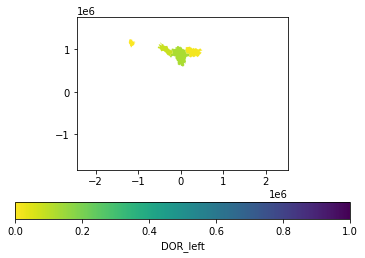

In [28]:
# var = "DOR_left"
# # dor_mergeGeo[var] = dor_merge_up[var]
# # dor_merge.plot()
# huc4.plot(column=var, legend=True, cmap='viridis_r',
#                  legend_kwds={'label': var, 'orientation': "horizontal"},
#                  vmin=0, vmax=1)

In [25]:
# huc4.columns

Index(['OBJECTID', 'TNMID', 'MetaSource', 'SourceData', 'SourceOrig',
       'SourceFeat', 'LoadDate', 'AreaSqKm', 'AreaAcres', 'GNIS_ID', 'Name',
       'States', 'HUC4', 'Shape_Leng', 'Shape_Area', 'layer', 'path',
       'HUC4_no', 'geometry', 'DOR_left', 'DOR_right', 'avg_LengthUp'],
      dtype='object')

<AxesSubplot:>

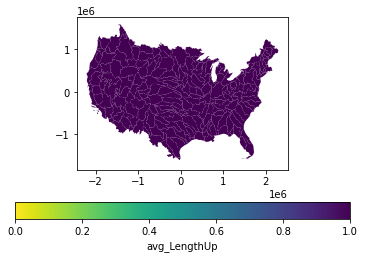

In [27]:
# var = "avg_LengthUp"
# # dor_mergeGeo[var] = dor_merge_up[var]
# # dor_merge.plot()
# huc4.plot(column=var, legend=True, cmap='viridis_r',
#                  legend_kwds={'label': var, 'orientation': "horizontal"},
#                  vmin=0, vmax=1)